In [1]:
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
import time
import scipy as sp
import numpy as np
import csv
%matplotlib inline

counter = 1;

fj=open("codesUnique.csv", "r")
codesReader = csv.reader(fj, delimiter = ',')
codes = []
for row in codesReader:
    codes.append(row)
    

fi=open("a_1.csv", "r")
def makeGraph(fi, counter):
    reader = csv.reader(fi, delimiter = ',')
    data = []
    G = nx.Graph()
    G.add_node("AREA " + str(counter))
    for row in reader:
        data.append(row)

    for item in data:
        if(item[3] != 'Crime Code'):
            if(item[3] in G.nodes()):
                G["AREA " + str(counter)][item[3]]['weight'] += 1
            else:
                G.add_node(item[3])
                G.add_edge("AREA " + str(counter), item[3], weight=1)
    while(len(G.nodes) > 11):  
        min = 100000000000
        minNode = None
        for node in G.nodes:
            if(node != "AREA " + str(counter)):
                if(G["AREA " + str(counter)] [node] ['weight'] < min):
                    min = G["AREA " + str(counter)] [node] ['weight']
                    minNode = node
        G.remove_node(minNode)
    
    print("AREA " + str(counter) + "- Crime Code" + "- Frequency" + "- Description")
    for n in G.nodes:
        if(n != "AREA " + str(counter)):
            for i in codes:
                if i[1] == n:
                    desc = i[2]
                    print("AREA " + str(counter) + " " + str(n) + " " + str(G["AREA " + str(counter)][n]['weight']) + " " + desc)

        #    print(desc)
    

    fi.close()
    nx.write_graphml(G,"a_1.graphml")
    plt.figure(1, figsize = (10,10))
    nx.draw(G, with_labels=True, font_weight='bold')
    plt.savefig('labels.png')
    counter+= 1


AREA 1- Crime Code- Frequency- Description
AREA 1 624 10382 BATTERY - SIMPLE ASSAULT
AREA 1 626 2845 INTIMATE PARTNER - SIMPLE ASSAULT
AREA 1 210 3680 ROBBERY
AREA 1 745 2913 VANDALISM - MISDEAMEANOR ($399 OR UNDER)
AREA 1 341 3195 THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD0036
AREA 1 230 3832 ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT
AREA 1 740 2586 VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS) 0114
AREA 1 330 4751 BURGLARY FROM VEHICLE
AREA 1 440 7532 THEFT PLAIN - PETTY ($950 & UNDER)
AREA 1 510 2519 VEHICLE - STOLEN


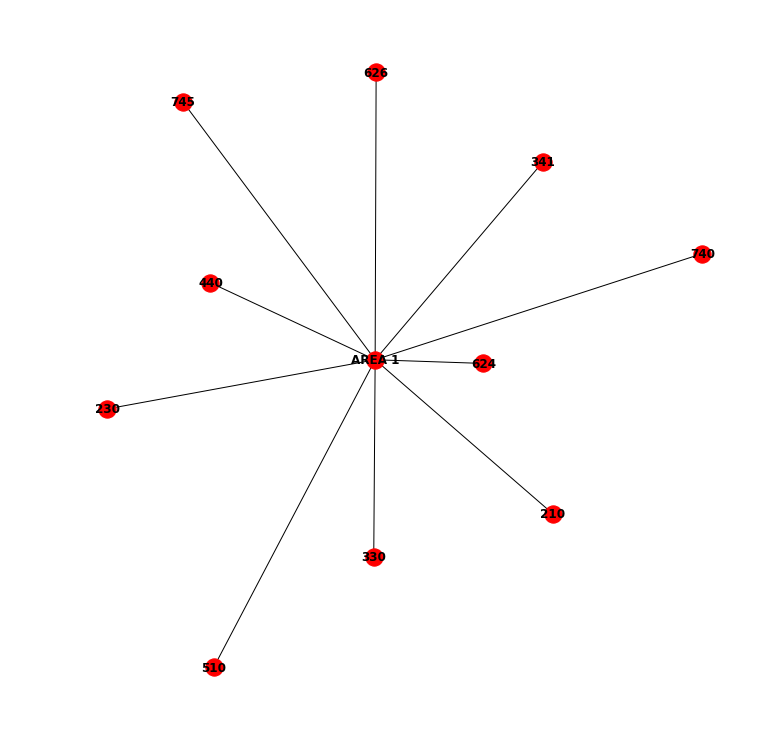

In [2]:
makeGraph(fi, counter)